<a href="https://colab.research.google.com/github/AkhileshMauryaa/Python_Machine_learning/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Diwali Sales Data.csv',encoding='latin-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
df.duplicated().sum()

8

In [ ]:
# droping Duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# droping null values and null columns
df = df.drop(['Status','unnamed1'], axis=1)

In [ ]:
# droping Null value
df.dropna(inplace=True)

In [ ]:
# change data types
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")

###Gender

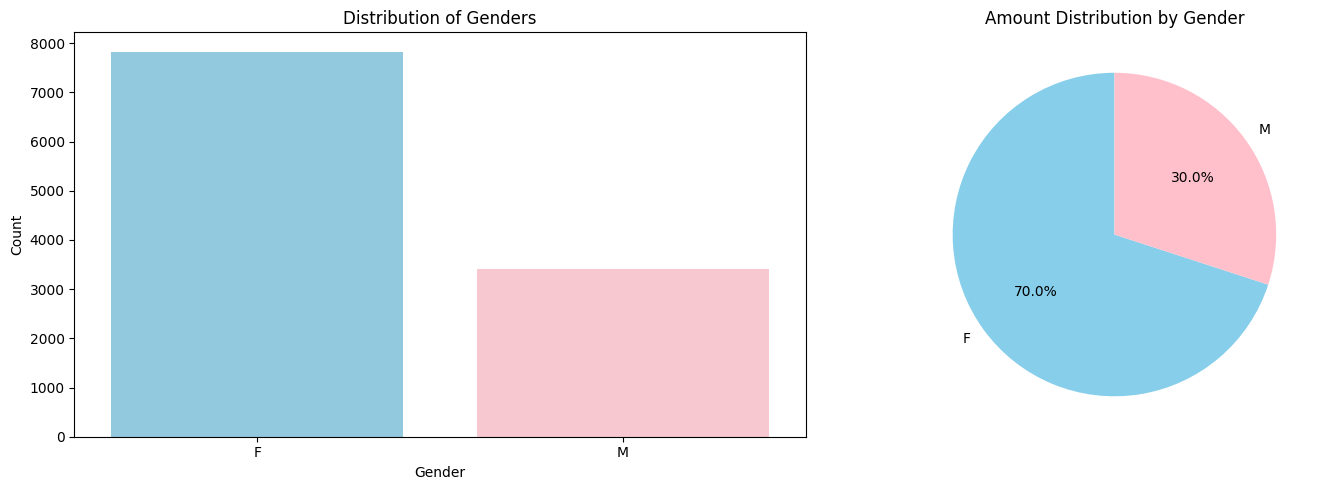

In [ ]:
df['Gender'].value_counts()
gender_amount = df.groupby('Gender')['Amount'].sum()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender',data= df, palette=['skyblue', 'pink'])
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')

# Second subplot: Amount spent by each gender
plt.subplot(1, 2, 2)
plt.pie(gender_amount, labels=gender_amount.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Amount Distribution by Gender')

plt.tight_layout()
plt.show()

From above graphs we can see that most of the buyers are 70% females are greater than men

### Age

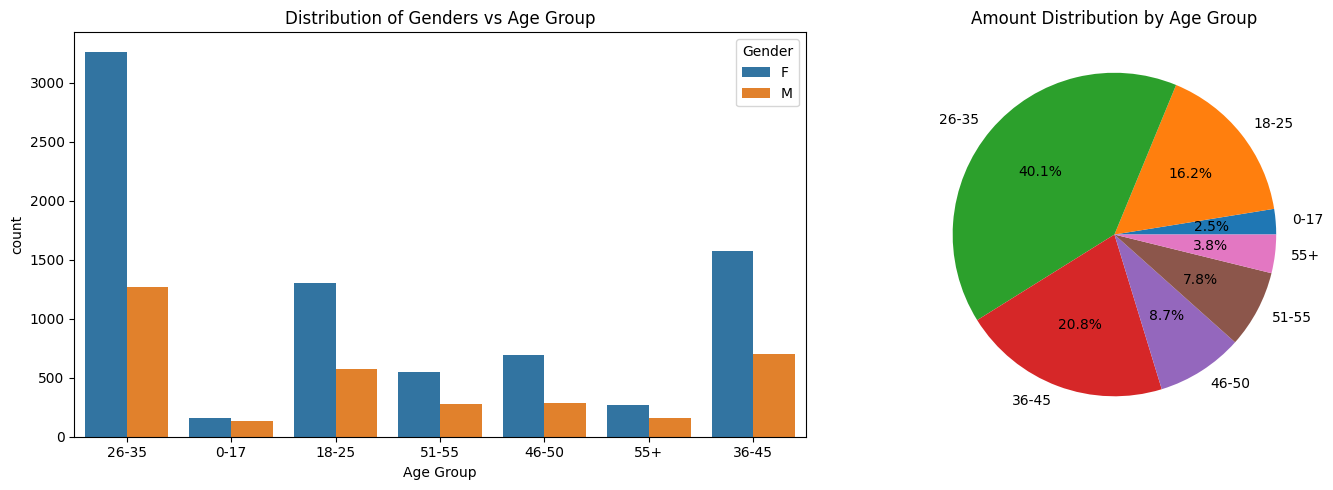

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.countplot(data = df, x ='Age Group', hue='Gender')
plt.title('Distribution of Genders vs Age Group')

# Second subplot: Amount spent by each Age Group
plt.subplot(1,2,2)
ageBy_sales = df.groupby('Age Group')['Amount'].sum()

plt.pie(x=ageBy_sales, labels=ageBy_sales.index, autopct='%1.1f%%')
plt.title('Amount Distribution by Age Group')

plt.tight_layout()
plt.show()

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State

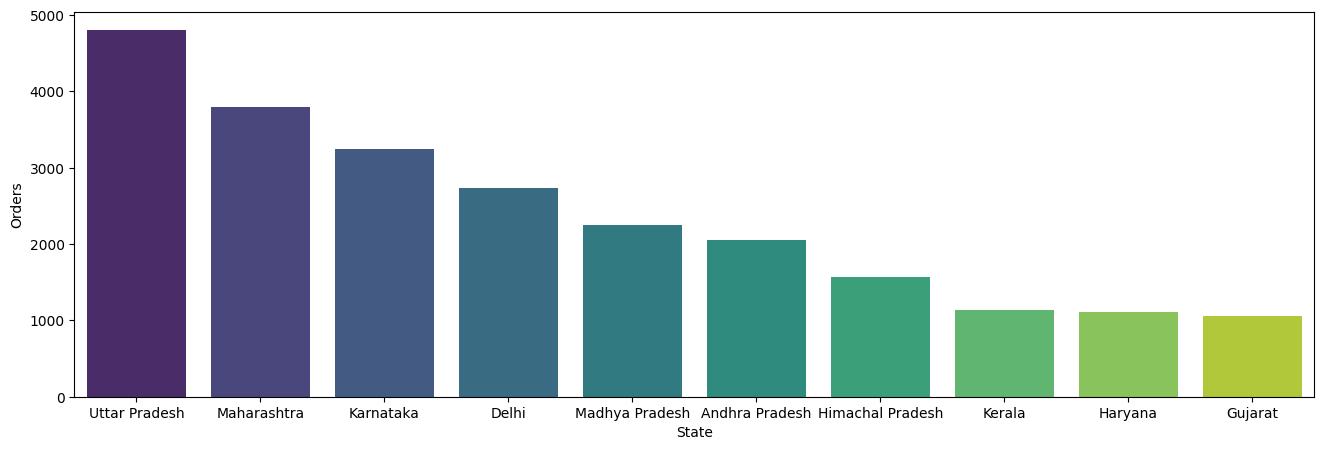

In [ ]:
sales_orders = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(16,5))
sns.barplot(data = sales_orders, x = 'State', y = 'Orders', palette='viridis')
plt.show()

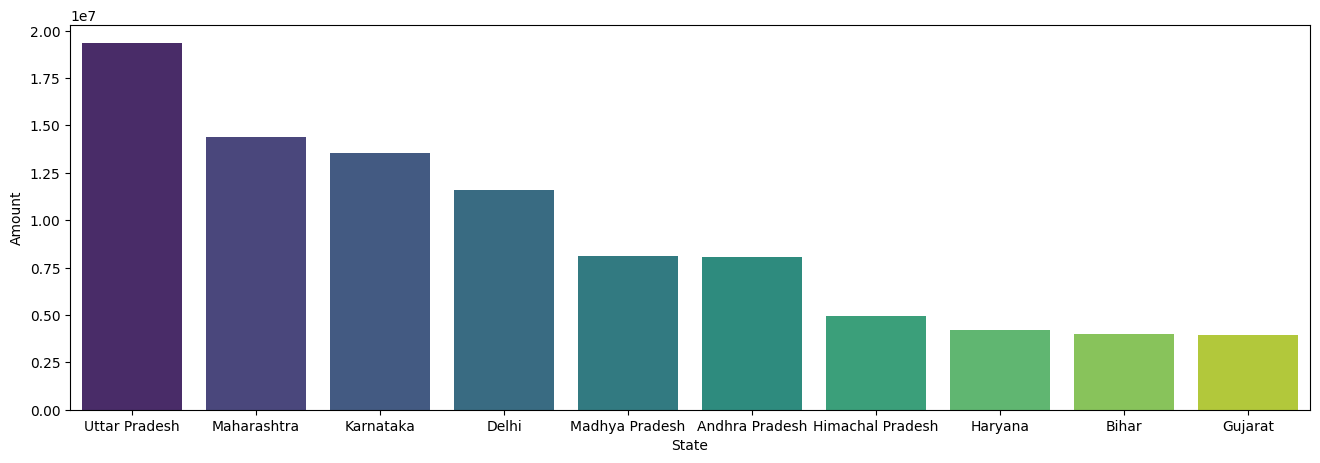

In [ ]:
state_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(16,5))
sns.barplot(state_amount,x='State', y = 'Amount',palette='viridis')
plt.show()

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

### Marital Status

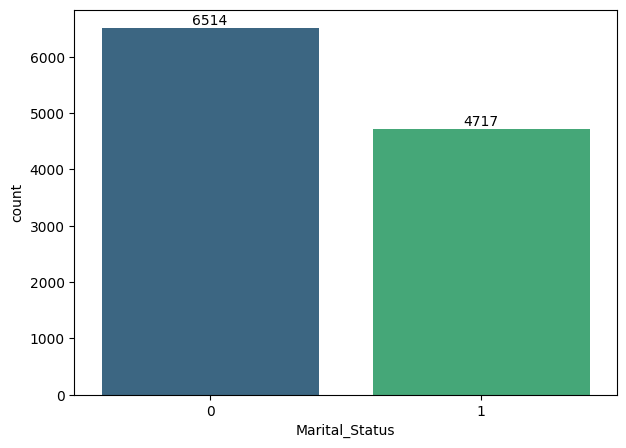

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data = df, x = 'Marital_Status', palette='viridis')

for bars in ax.containers:
  ax.bar_label(bars)

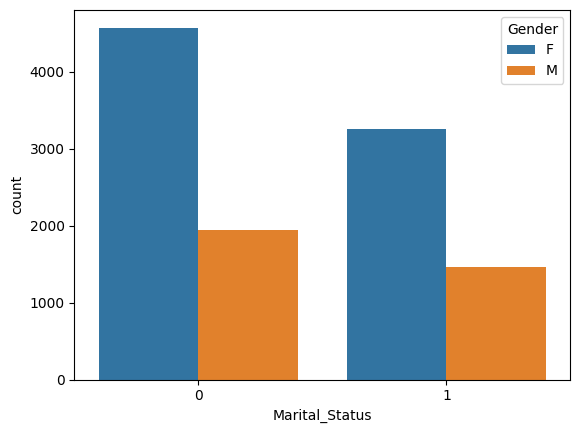

In [ ]:
sns.countplot(data=df, x='Marital_Status',hue='Gender')
plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### Occupation

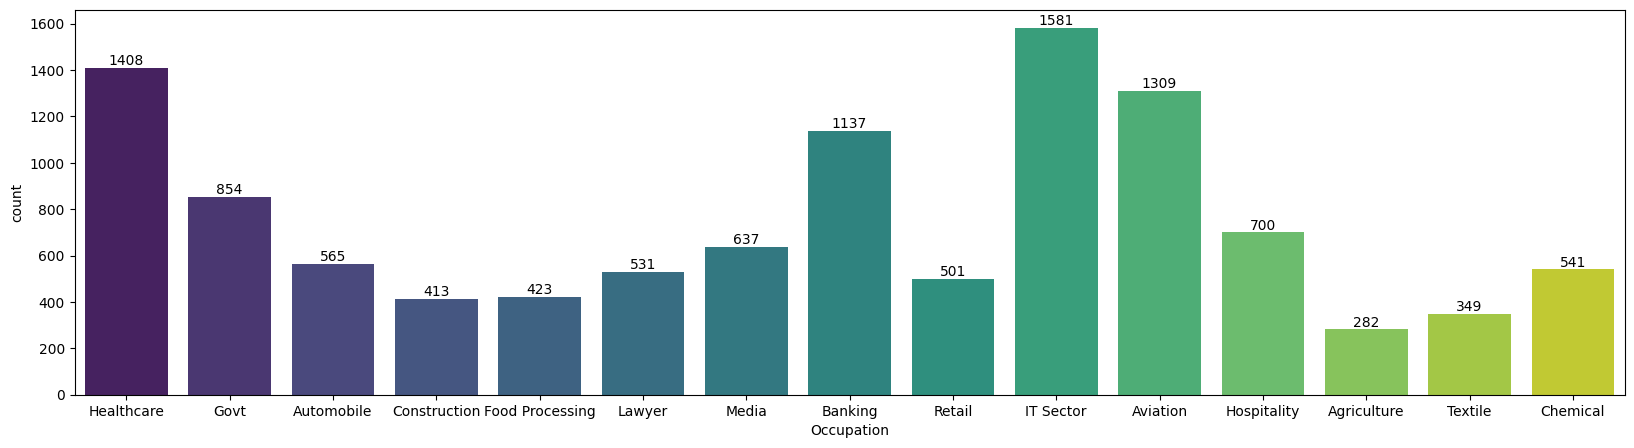

In [ ]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df, x='Occupation',palette='viridis')

for bars in ax.containers:
  ax.bar_label(bars)

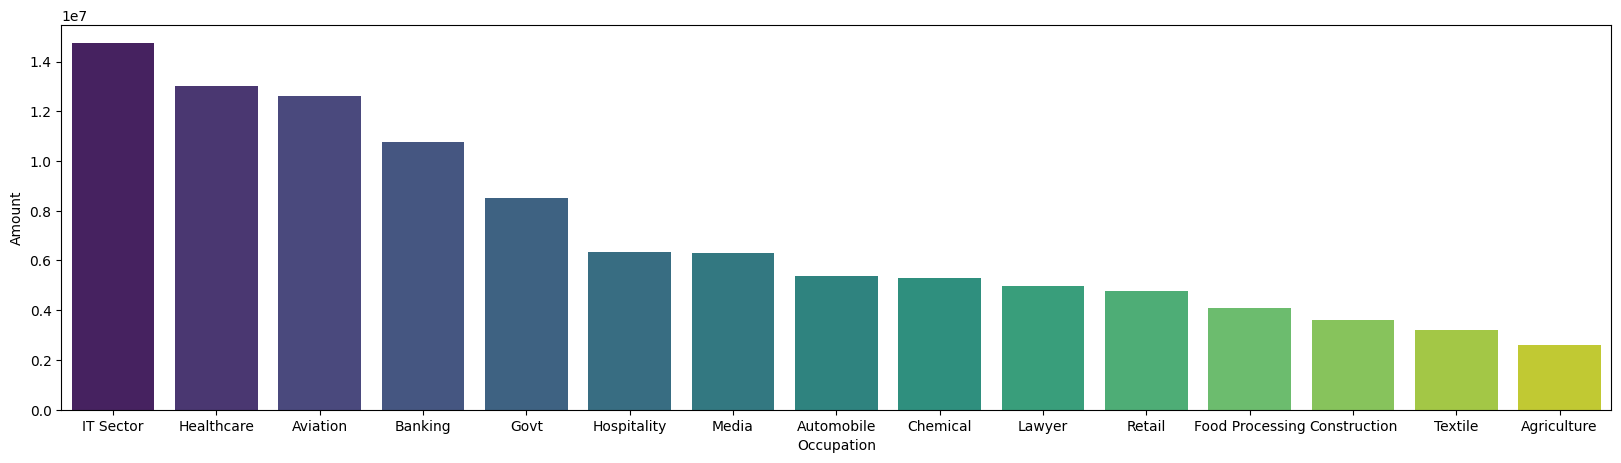

In [ ]:
plt.figure(figsize=(20,5))
occ_amount = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data = occ_amount, x='Occupation', y= 'Amount', palette='viridis')
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

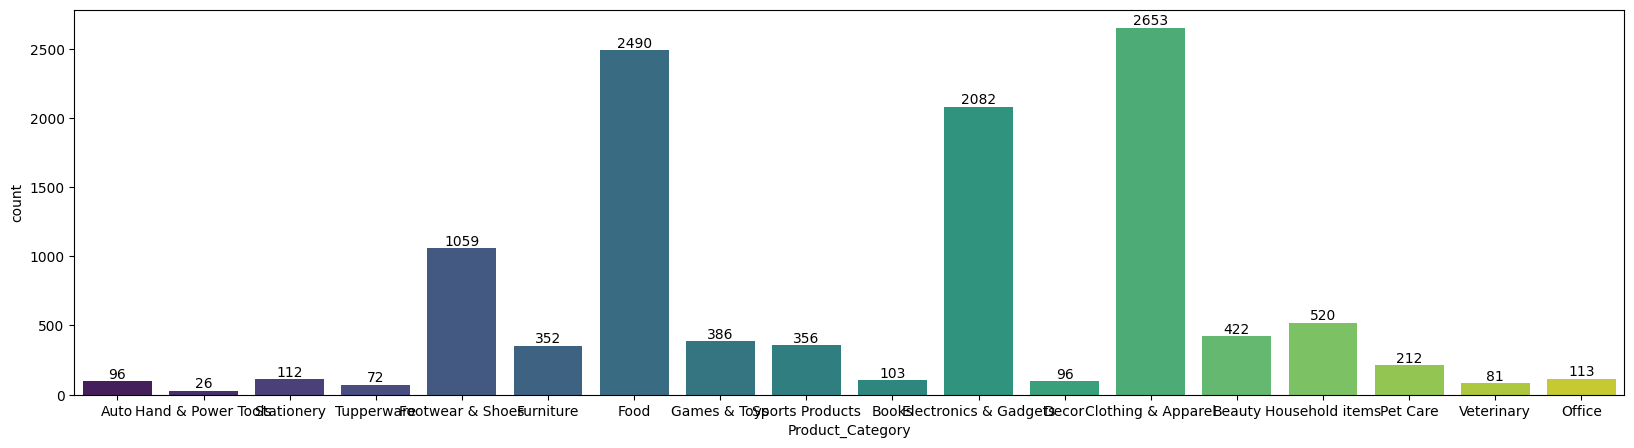

In [ ]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df, x='Product_Category',palette='viridis')

for bars in ax.containers:
  ax.bar_label(bars)

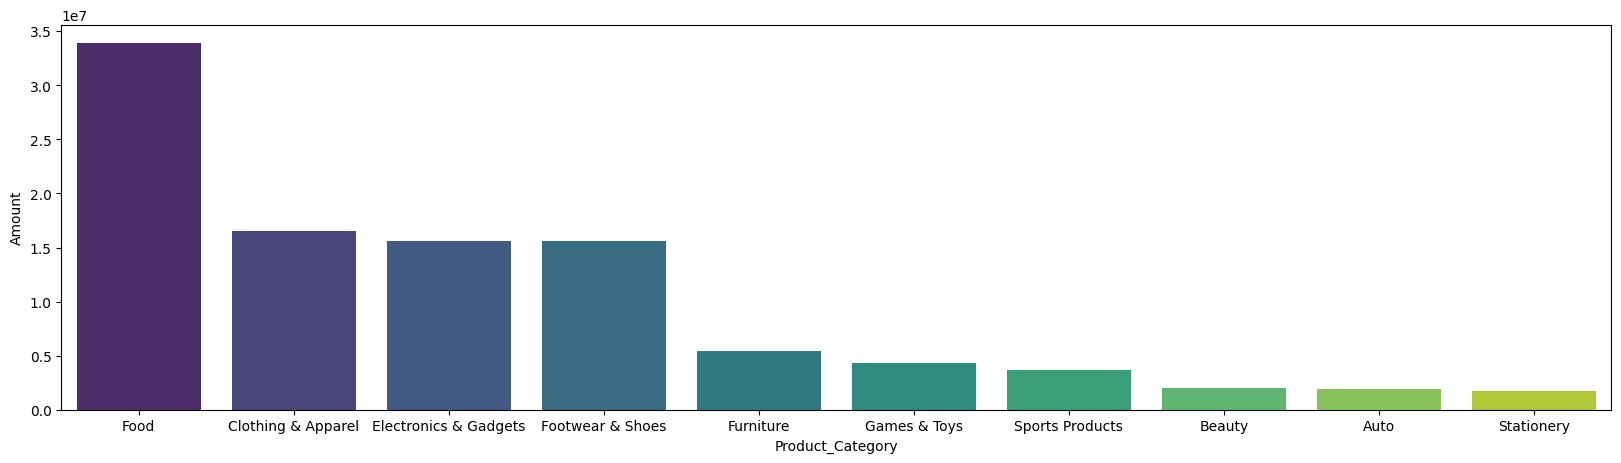

In [ ]:
plt.figure(figsize=(20,5))
occ_amount = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data = occ_amount, x='Product_Category', y= 'Amount', palette='viridis')
plt.show()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

# conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category